# 50_Startups ~ Multiple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
startup = pd.read_csv("50_startups.csv")
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
startup.shape

(50, 5)

In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
startup01 = pd.get_dummies(startup,["State"])
startup01

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [10]:
startup01.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


# Drop the New York column as it has the least correlation with profit

In [11]:
startup01 =startup01.drop("State_New York",axis=1)
startup01

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


In [12]:
startup01.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000


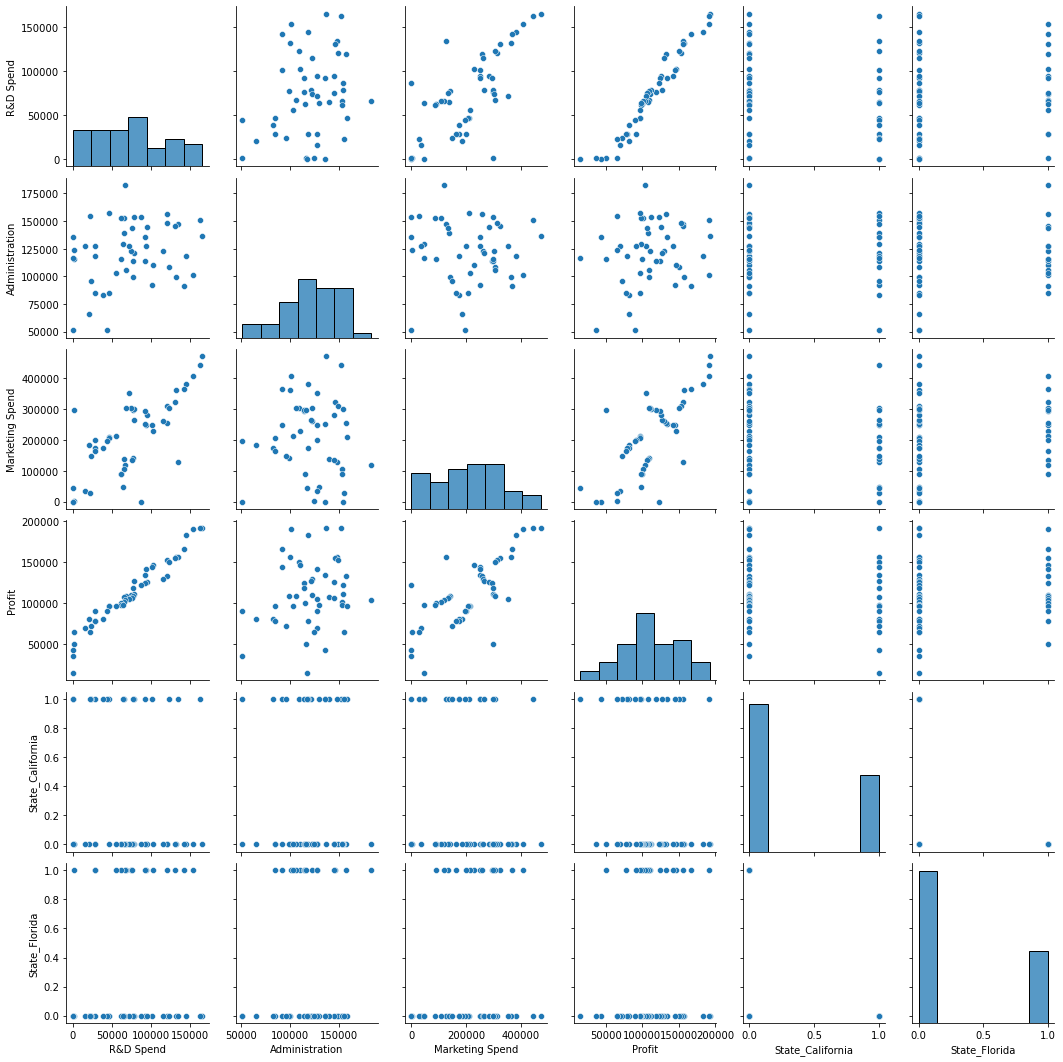

In [14]:
sns.pairplot(startup01)

In [17]:
data = startup01.rename({"R&D Spend":"RD","Administration":"Admin","Marketing Spend":"Marketing","State_California":"SC","State_Florida":"SF"},axis=1)
data

,RD,Admin,Marketing,Profit,SC,SF
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


In [18]:
Y = data['Profit']
Y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [19]:
X = data.loc[ : , data.columns != 'Profit']
X

,RD,Admin,Marketing,SC,SF
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1
5,131876.90,99814.71,362861.36,0,0
6,134615.46,147198.87,127716.82,1,0
7,130298.13,145530.06,323876.68,0,1
8,120542.52,148718.95,311613.29,0,0
9,123334.88,108679.17,304981.62,1,0


# Building of model

In [20]:
model = smf.ols("Profit~RD+Admin+Marketing+SC+SF",data=data).fit()
model.params

Intercept    50083.456813
RD               0.806023
Admin           -0.027004
Marketing        0.026980
SC              41.887019
SF             240.675812
dtype: float64

In [21]:
model.fittedvalues

0     192390.571364
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292788
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725743
19    115594.188410
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311047
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364709
46     56272.992680
47     46468.232003
48     49123.073082
49     48185.038791


In [22]:
np.round(model.tvalues,4)

Intercept     7.2036
RD           17.3686
Admin        -0.5170
Marketing     1.5739
SC            0.0129
SF            0.0721
dtype: float64

In [23]:
np.round(model.pvalues,4)

Intercept    0.0000
RD           0.0000
Admin        0.6077
Marketing    0.1227
SC           0.9898
SF           0.9429
dtype: float64

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           1.34e-27
Time:                        18:16:56   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
RD             0.8060      0.046     17.369      0.000       0.712       0.900
Admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing      0.0270      0.017      1.574      0.123      -0.008       0.062
SC            41.8870   3256.039      0.013      0.990   -6520.229    6604.003
SF           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Build linear model with variables whose P-value is greater than 0.05

In [25]:
model_a= smf.ols("Profit~Admin",data=data).fit()
np.round(model_a.pvalues,4)

Intercept    0.0038
Admin        0.1622
dtype: float64

In [26]:
model_a.rsquared

0.04028714077757223

<AxesSubplot:xlabel='Admin', ylabel='Profit'>

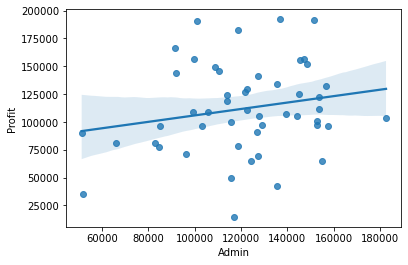

In [27]:
sns.regplot(x='Admin',y='Profit',data=data)

In [28]:
model_m = smf.ols("Profit~Marketing",data=data).fit()
np.round(model_m.pvalues,4)

Intercept    0.0
Marketing    0.0
dtype: float64

In [29]:
model_m.rsquared

0.5591535746115515

<AxesSubplot:xlabel='Marketing', ylabel='Profit'>

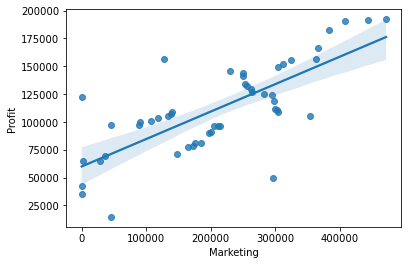

In [30]:
sns.regplot(x='Marketing',y='Profit',data=data)

In [31]:
model_c = smf.ols("Profit~SC",data=data).fit()
np.round(model_c.pvalues,4)

Intercept    0.0000
SC           0.3122
dtype: float64

In [32]:
model_c.rsquared

0.021268441461162024

In [34]:
model_f = smf.ols("Profit~SF",data=data).fit()
np.round(model_f.pvalues,4)

Intercept    0.0000
SF           0.4214
dtype: float64

In [35]:
model_f.rsquared

0.013512728677721686

# Since SF has the highest p-value and the least linear correlation with profit drop variable SF

In [37]:
data = data.drop('SF',axis=1)
data

,RD,Admin,Marketing,Profit,SC
0,165349.20,136897.80,471784.10,192261.83,0
1,162597.70,151377.59,443898.53,191792.06,1
2,153441.51,101145.55,407934.54,191050.39,0
3,144372.41,118671.85,383199.62,182901.99,0
4,142107.34,91391.77,366168.42,166187.94,0
5,131876.90,99814.71,362861.36,156991.12,0
6,134615.46,147198.87,127716.82,156122.51,1
7,130298.13,145530.06,323876.68,155752.60,0
8,120542.52,148718.95,311613.29,152211.77,0
9,123334.88,108679.17,304981.62,149759.96,1


In [38]:
model = smf.ols('Profit~Admin+Marketing+RD+SC',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           8.51e-29
Time:                        18:20:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.016e+04   6798.992      7.377      0.000    3.65e+04    6.39e+04
Admin         -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing      0.0272      0.017      1.627      0.111      -0.006       0.061
RD             0.8057      0.046     17.646      0.000       0.714       0.898
SC           -70.2265   2828.752     -0.025      0.980   -5767.625    5627.172
==============================================================================
Omnibus:                       14.785   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.242
Skew:                          -0.949   Prob(JB):                     2.44e-05
Kurtosis:                       5.568   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
model.rsquared

0.9507466686514052

# Model Validation ~ Calculating VIF

In [41]:
rsq_r = smf.ols("RD~Marketing+Admin+SC",data=data).fit().rsquared
vif_r = 1/(1-rsq_r)
vif_r

2.4703745766185436

In [42]:
rsq_m = smf.ols("Marketing~RD+Admin+SC",data=data).fit().rsquared
vif_m = 1/(1-rsq_m)
vif_m

2.3475090136376275

In [43]:
rsq_a = smf.ols("Admin~Marketing+RD+SC",data=data).fit().rsquared
vif_a = 1/(1-rsq_a)
vif_a

1.175213342574746

In [44]:
rsq_c = smf.ols("SC~Marketing+Admin+RD",data=data).fit().rsquared
vif_c = 1/(1-rsq_c)
vif_c

1.0304337121541793

In [45]:
D = pd.DataFrame({"Variables":["RD","Admin","Marketing","SC"],"VIF":[vif_r,vif_a,vif_m,vif_c]})
D

,Variables,VIF
0,RD,2.470375
1,Admin,1.175213
2,Marketing,2.347509
3,SC,1.030434


In [46]:
model.resid

0      -270.396992
1      2693.570257
2      8888.851194
3      9190.044210
4     -5967.903026
5     -6606.291279
6     -1946.462123
7     -4286.359669
8       451.767419
9     -5073.505023
10    10590.403015
11     8733.905222
12    12425.737178
13     6868.021397
14   -16966.361376
15   -16338.873220
16    10126.074642
17    -4842.275784
18    -4767.528443
19     7110.312286
20     1884.098896
21    -6026.297587
22    -4374.984628
23    -1283.222986
24    -4837.745794
25     5210.103748
26    -4893.570633
27    -9418.056370
28     1595.445445
29     -818.080529
30      456.267458
31     -232.898840
32    -1533.751468
33    -1160.567365
34     7719.586779
35     5942.577839
36    15396.580660
37      373.670275
38    11504.544347
39    -2679.780970
40     3467.534654
41     2968.835377
42      920.256666
43     9559.690495
44      627.214372
45    17241.426318
46    -6698.053369
47    -3894.591036
48   -13533.015349
49   -33495.946284
dtype: float64

Text(0.5, 1.0, 'QQ plot of residuals')

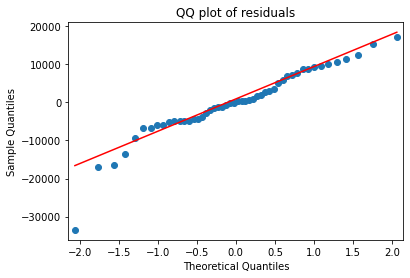

In [47]:
qqplot = sm.qqplot(model.resid,line='q')
plt.title("QQ plot of residuals")

<AxesSubplot:>

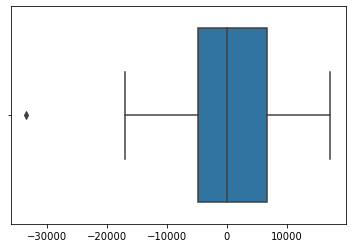

In [50]:
sns.boxplot(model.resid)

# Residual Plot for Homoscedasticity

In [53]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Standardized residual values')

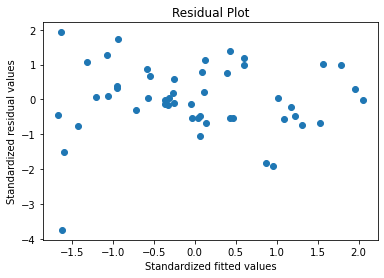

In [55]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")

eval_env: 1


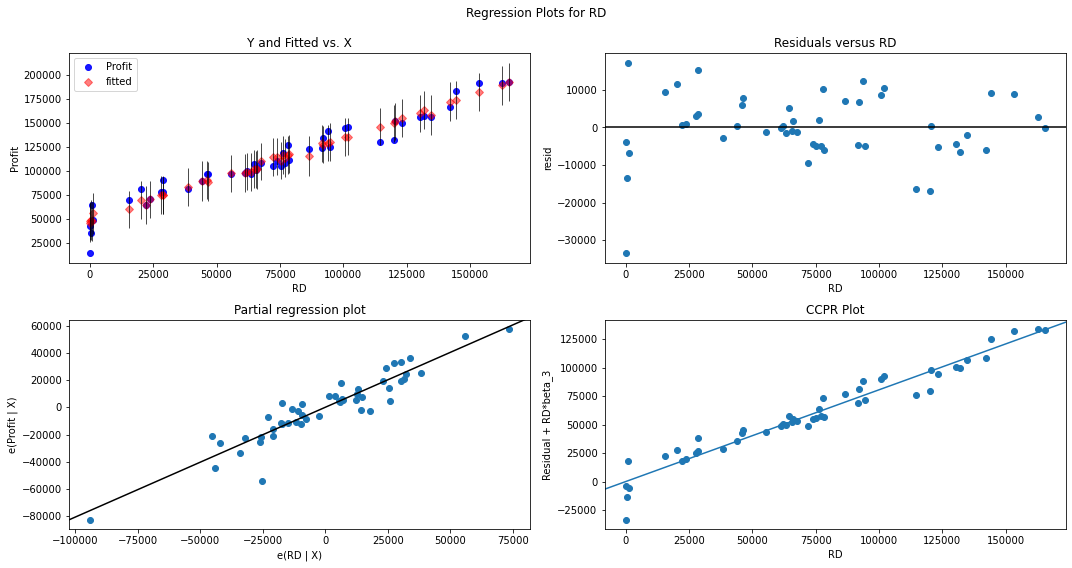

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"RD",fig=fig)

eval_env: 1


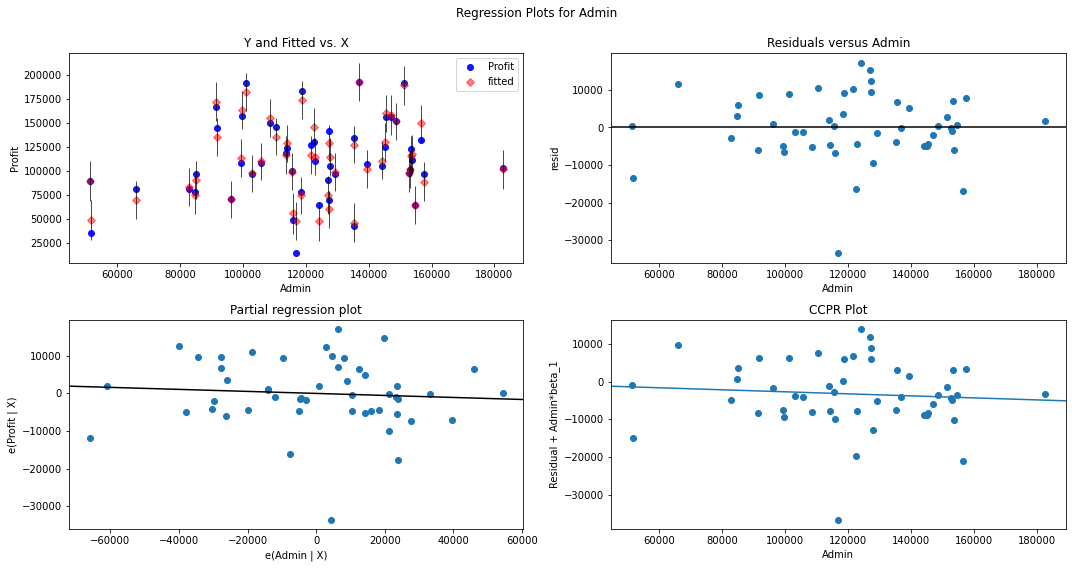

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Admin",fig=fig)

eval_env: 1


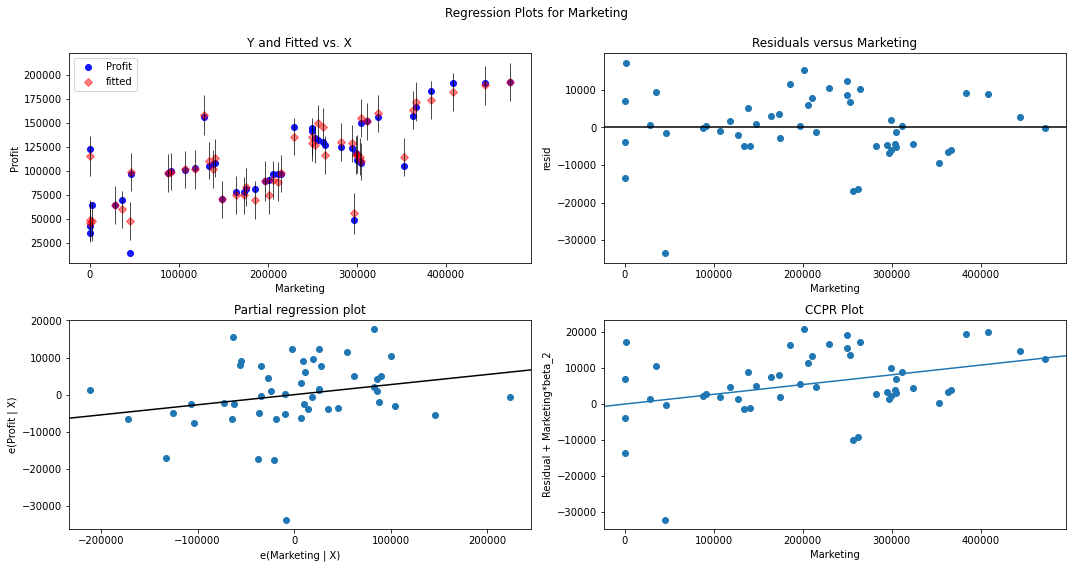

In [58]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Marketing",fig=fig)

eval_env: 1


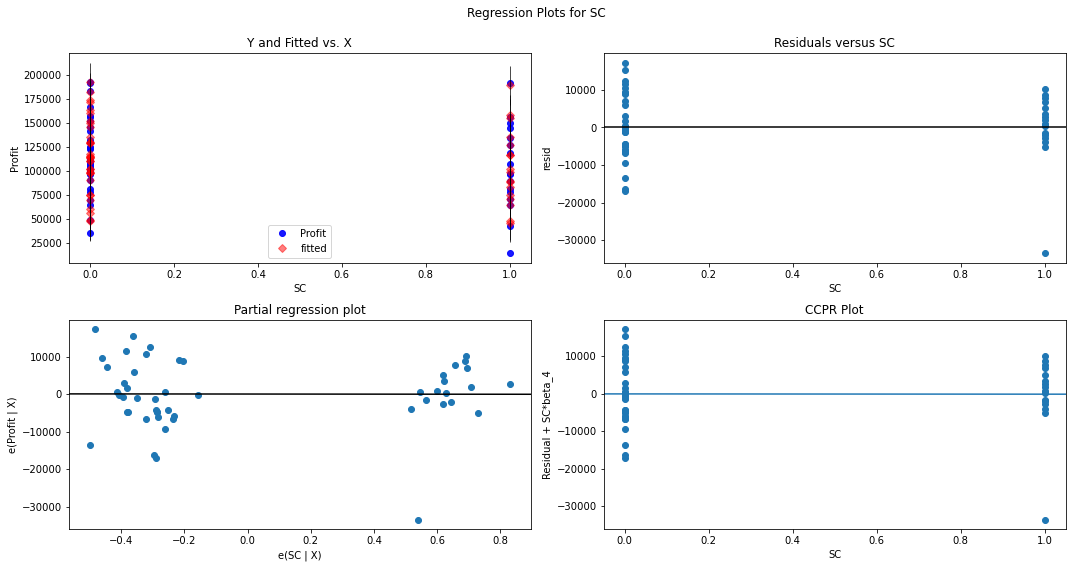

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"SC",fig=fig)

# Model Delegation Diagnostics
Detecting Influence / Outliers
Cook's Distance

In [60]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

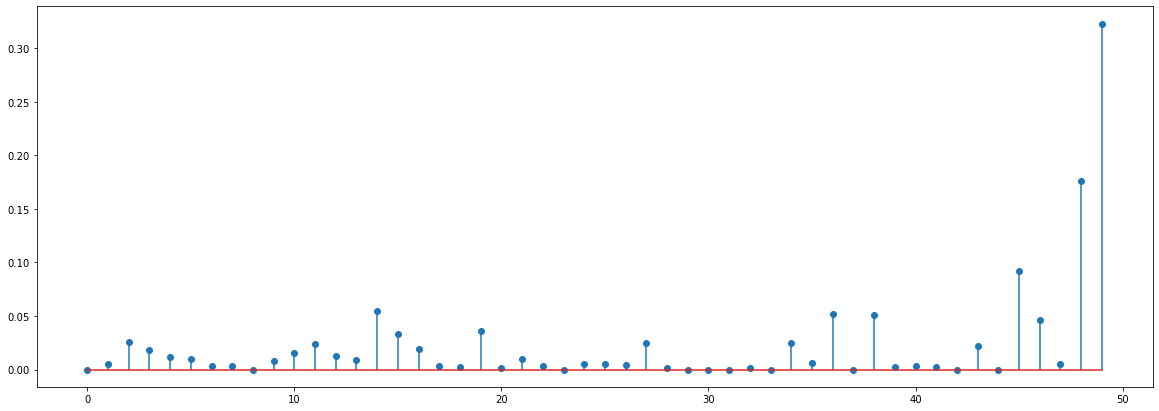

In [61]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.show()

In [62]:
(np.argmax(c),np.max(c))

(49, 0.3232635046937491)

In [63]:
data[data.index.isin([48,49])]

,RD,Admin,Marketing,Profit,SC
48,542.05,51743.15,0.00,35673.41,0
49,0.00,116983.80,45173.06,14681.40,1


In [64]:
data1 = data.drop(data.index[[48,49]],axis=0)
data1

,RD,Admin,Marketing,Profit,SC
0,165349.20,136897.80,471784.10,192261.83,0
1,162597.70,151377.59,443898.53,191792.06,1
2,153441.51,101145.55,407934.54,191050.39,0
3,144372.41,118671.85,383199.62,182901.99,0
4,142107.34,91391.77,366168.42,166187.94,0
5,131876.90,99814.71,362861.36,156991.12,0
6,134615.46,147198.87,127716.82,156122.51,1
7,130298.13,145530.06,323876.68,155752.60,0
8,120542.52,148718.95,311613.29,152211.77,0
9,123334.88,108679.17,304981.62,149759.96,1


In [65]:
model2 = smf.ols("Profit~RD+Admin+Marketing+SC",data=data1).fit()

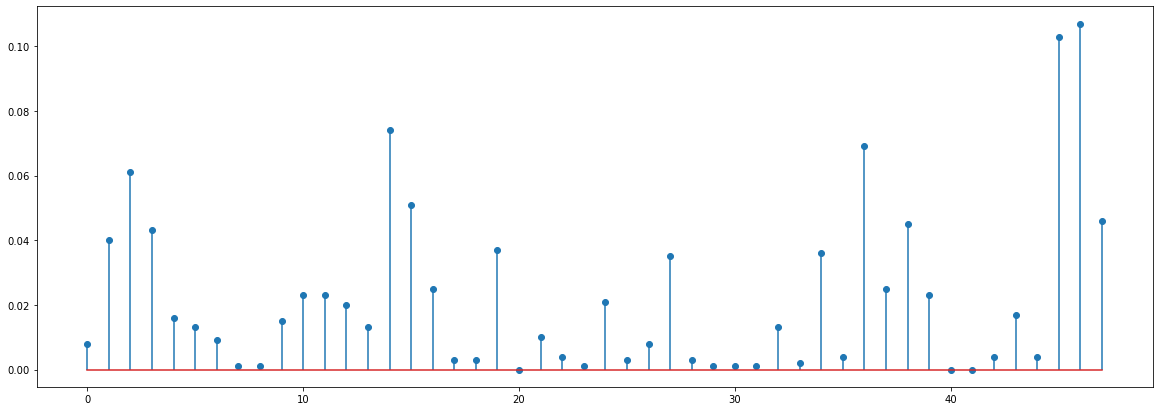

In [66]:
model_influence2 = model2.get_influence()
(c_2, _) = model_influence2.cooks_distance
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_2,3))
plt.show()

In [67]:
(np.argmax(c_2),np.max(c_2))

(46, 0.10722656225713356)

In [68]:
data2 = data1.drop(data1.index[[45,46]],axis=0).reset_index()
data2

,index,RD,Admin,Marketing,Profit,SC
0,0,165349.20,136897.80,471784.10,192261.83,0
1,1,162597.70,151377.59,443898.53,191792.06,1
2,2,153441.51,101145.55,407934.54,191050.39,0
3,3,144372.41,118671.85,383199.62,182901.99,0
4,4,142107.34,91391.77,366168.42,166187.94,0
5,5,131876.90,99814.71,362861.36,156991.12,0
6,6,134615.46,147198.87,127716.82,156122.51,1
7,7,130298.13,145530.06,323876.68,155752.60,0
8,8,120542.52,148718.95,311613.29,152211.77,0
9,9,123334.88,108679.17,304981.62,149759.96,1


In [69]:
data2 = data2.drop(['index'],axis=1)
data2

,RD,Admin,Marketing,Profit,SC
0,165349.20,136897.80,471784.10,192261.83,0
1,162597.70,151377.59,443898.53,191792.06,1
2,153441.51,101145.55,407934.54,191050.39,0
3,144372.41,118671.85,383199.62,182901.99,0
4,142107.34,91391.77,366168.42,166187.94,0
5,131876.90,99814.71,362861.36,156991.12,0
6,134615.46,147198.87,127716.82,156122.51,1
7,130298.13,145530.06,323876.68,155752.60,0
8,120542.52,148718.95,311613.29,152211.77,0
9,123334.88,108679.17,304981.62,149759.96,1


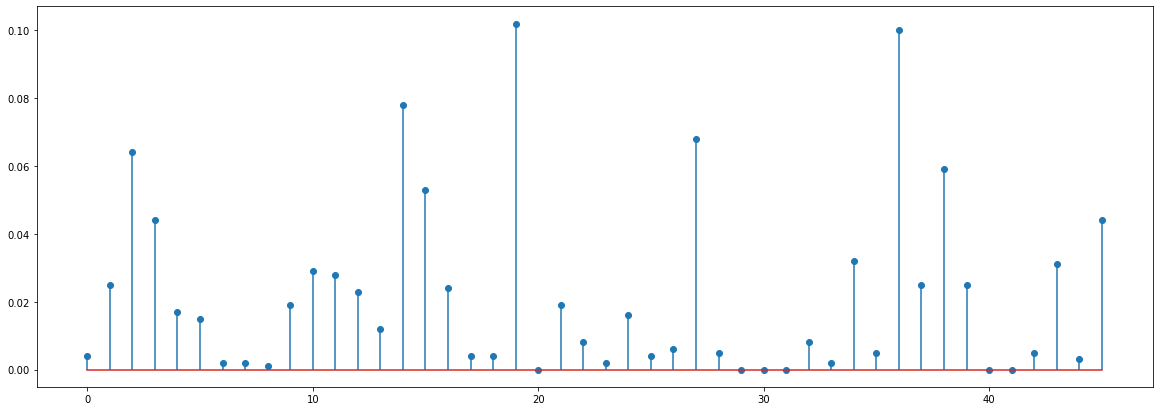

In [71]:
model3 = smf.ols("Profit~RD+Admin+Marketing+SC",data=data2).fit()
model_influence3 = model3.get_influence()
(c_3, _) = model_influence3.cooks_distance
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_3,3))
plt.show()

In [72]:
(np.argmax(c_3),np.max(c_3))

(19, 0.10207418812900479)

In [73]:
data3 = data2.drop(data2.index[[19]],axis=0).reset_index()
data3

,index,RD,Admin,Marketing,Profit,SC
0,0,165349.20,136897.80,471784.10,192261.83,0
1,1,162597.70,151377.59,443898.53,191792.06,1
2,2,153441.51,101145.55,407934.54,191050.39,0
3,3,144372.41,118671.85,383199.62,182901.99,0
4,4,142107.34,91391.77,366168.42,166187.94,0
5,5,131876.90,99814.71,362861.36,156991.12,0
6,6,134615.46,147198.87,127716.82,156122.51,1
7,7,130298.13,145530.06,323876.68,155752.60,0
8,8,120542.52,148718.95,311613.29,152211.77,0
9,9,123334.88,108679.17,304981.62,149759.96,1


In [74]:
data3 = data3.drop(['index'],axis=1)
data3

,RD,Admin,Marketing,Profit,SC
0,165349.20,136897.80,471784.10,192261.83,0
1,162597.70,151377.59,443898.53,191792.06,1
2,153441.51,101145.55,407934.54,191050.39,0
3,144372.41,118671.85,383199.62,182901.99,0
4,142107.34,91391.77,366168.42,166187.94,0
5,131876.90,99814.71,362861.36,156991.12,0
6,134615.46,147198.87,127716.82,156122.51,1
7,130298.13,145530.06,323876.68,155752.60,0
8,120542.52,148718.95,311613.29,152211.77,0
9,123334.88,108679.17,304981.62,149759.96,1


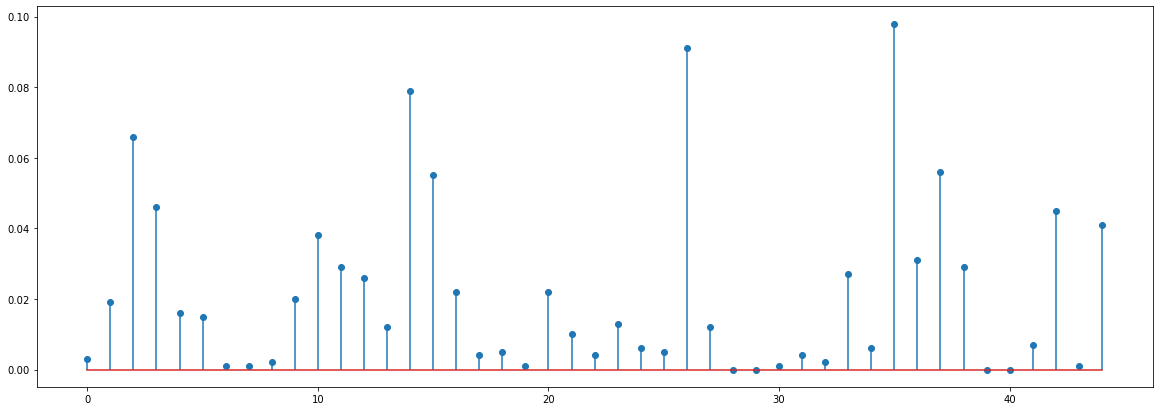

In [75]:
model4 = smf.ols("Profit~RD+Admin+Marketing+SC",data=data3).fit()
model_influence4 = model4.get_influence()
(c_4, _) = model_influence4.cooks_distance
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data3)),np.round(c_4,3))
plt.show()

In [76]:
(np.argmax(c_4),np.max(c_4))

(35, 0.09834403220657599)

In [78]:
model_final = smf.ols("Profit~RD+Admin+Marketing+SC",data=data3).fit()
(model_final.rsquared,model_final.aic)

(0.9644048254411673, 930.3223367567633)

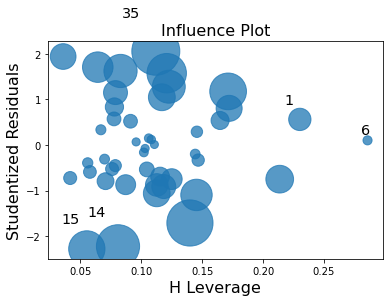

In [79]:
influence_plot(model_final)
plt.show()

In [80]:
model_final.resid

0      1911.838412
1      3507.814693
2     10250.612783
3     10774.719239
4     -4989.694158
5     -5908.176995
6       608.197956
7     -2147.838559
8      2298.835481
9     -5865.393410
10    11409.283876
11     6947.000543
12    13030.783994
13     5678.442051
14   -14389.220679
15   -14921.529840
16     7765.073363
17    -4100.690941
18    -5057.086540
19    -1109.870527
20    -6076.564150
21    -5443.672729
22    -3112.035910
23    -4645.268225
24     3914.748520
25    -3623.924651
26   -10973.429691
27     3499.368230
28      452.621170
29      794.206678
30      997.873061
31    -2196.765946
32    -2736.530437
33     5188.150001
34     3538.228490
35    13182.666683
36    -4737.844364
37     7531.039960
38    -7068.783081
39     -527.500317
40       58.681705
41    -3625.492080
42     8394.903748
43    -1323.430834
44    -7154.346562
dtype: float64

In [81]:
model_final.fittedvalues

0     190349.991588
1     188284.245307
2     180799.777217
3     172127.270761
4     171177.634158
5     162899.296995
6     155514.312044
7     157900.438559
8     149912.934519
9     155625.353410
10    134712.666124
11    137312.399457
12    128554.736006
13    128628.907949
14    146991.870679
15    144838.569840
16    119227.856637
17    129471.060941
18    129323.986540
19    119583.900527
20    117389.584150
21    115795.922729
22    111846.025910
23    113197.308225
24    103489.591480
25    109357.464651
26    115981.739691
27     99783.011770
28    100552.018830
29     99143.383322
30     96485.686939
31     99624.605946
32     99515.450437
33     91524.649999
34     92941.281510
35     77525.523317
36     94686.984364
37     73698.020040
38     88074.543081
39     78767.410317
40     77740.148295
41     75123.982080
42     61364.076252
43     66523.760834
44     49714.076562
dtype: float64

In [82]:
data3["Predicted"]=model_final.fittedvalues
data3["Errors"]=model_final.resid
data3

,RD,Admin,Marketing,Profit,SC,Predicted,Errors
0,165349.20,136897.80,471784.10,192261.83,0,190349.991588,1911.838412
1,162597.70,151377.59,443898.53,191792.06,1,188284.245307,3507.814693
2,153441.51,101145.55,407934.54,191050.39,0,180799.777217,10250.612783
3,144372.41,118671.85,383199.62,182901.99,0,172127.270761,10774.719239
4,142107.34,91391.77,366168.42,166187.94,0,171177.634158,-4989.694158
5,131876.90,99814.71,362861.36,156991.12,0,162899.296995,-5908.176995
6,134615.46,147198.87,127716.82,156122.51,1,155514.312044,608.197956
7,130298.13,145530.06,323876.68,155752.60,0,157900.438559,-2147.838559
8,120542.52,148718.95,311613.29,152211.77,0,149912.934519,2298.835481
9,123334.88,108679.17,304981.62,149759.96,1,155625.353410,-5865.393410
